<a href="https://colab.research.google.com/github/niharika4246/AV/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.animation as animation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/dataset_tk.csv',index_col='Date',parse_dates=True)

In [5]:
df.head()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Total Consumption
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-01,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,319.5,253.0,428.6,12.8,18.6,164.6,204.2,206.3,72.7,268.3,6.3,82.3,24.8,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,3373.4
2019-03-01,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,316.7,253.6,419.6,13.7,18.2,170.1,204.5,212.2,73.6,285.2,6.5,82.0,25.6,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,3403.7
2019-04-01,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,301.9,239.3,395.8,12.6,16.7,165.2,201.2,205.3,73.4,270.3,6.4,82.9,26.3,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,3304.1
2019-05-01,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,313.2,228.2,411.1,13.0,17.6,167.4,201.7,212.4,75.4,286.8,6.6,77.0,23.0,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,3308.9
2019-06-01,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,320.7,227.4,408.6,12.9,18.6,171.2,194.9,217.5,75.4,298.3,7.2,76.4,22.6,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3,3316.9


In [6]:
df1=df['Total Consumption']

In [7]:
df1


Date
2019-02-01    3373.4
2019-03-01    3403.7
2019-04-01    3304.1
2019-05-01    3308.9
2019-06-01    3316.9
               ...  
2020-01-12    3741.5
2020-02-12    3763.8
2020-03-12    3726.6
2020-04-12    3642.1
2020-05-12    3407.0
Name: Total Consumption, Length: 503, dtype: float64

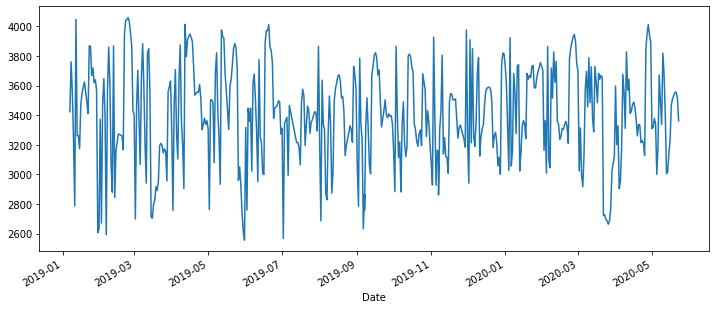

In [8]:
df1.plot(figsize=(12,5))

In [9]:
np.random.seed(7)

In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(503, 1)

In [12]:
#splitting dataset into train and test
training_size=int(len(df1)*0.65)       #0.65
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(326, 177)

In [14]:
#X = series.values
#train, test = X[0:-12], X[-12:]

In [15]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t and Y=t+1
look_back = 100     #100 time_step
X_train, y_train = create_dataset(train_data, look_back)
X_test, ytest = create_dataset(test_data, look_back)

In [17]:
print(X_train.shape), print(y_train.shape)

(225, 100)
(225,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(76, 100)
(76,)


(None, None)

In [19]:
#reshape input to be [samples, time steps, features]
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:
# create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [21]:
#define model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))  #100,1
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)   ##400 epochs

#from keras import callbacks
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                       # mode ="min", patience = 5, 
                                        #restore_best_weights = True)
  
#history = model.fit(X_train,y_train,validation_data=(X_test,ytest), batch_size = 64, 
                    #epochs = 400,callbacks =[earlystopping])

Epoch 1/100
4/4 [==============================] - 7s 555ms/step - loss: 0.2583 - val_loss: 0.1184
Epoch 2/100
4/4 [==============================] - 1s 194ms/step - loss: 0.0733 - val_loss: 0.0622
Epoch 3/100
4/4 [==============================] - 1s 195ms/step - loss: 0.0668 - val_loss: 0.0493
Epoch 4/100
4/4 [==============================] - 1s 195ms/step - loss: 0.0550 - val_loss: 0.0691
Epoch 5/100
4/4 [==============================] - 1s 204ms/step - loss: 0.0572 - val_loss: 0.0476
Epoch 6/100
4/4 [==============================] - 1s 193ms/step - loss: 0.0444 - val_loss: 0.0377
Epoch 7/100
4/4 [==============================] - 1s 192ms/step - loss: 0.0482 - val_loss: 0.0373
Epoch 8/100
4/4 [==============================] - 1s 201ms/step - loss: 0.0442 - val_loss: 0.0423
Epoch 9/100
4/4 [==============================] - 1s 201ms/step - loss: 0.0437 - val_loss: 0.0450
Epoch 10/100
4/4 [==============================] - 1s 193ms/step - loss: 0.0434 - val_loss: 0.0402
Epoch 11/

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.5.0'

In [26]:
# the prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
#transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

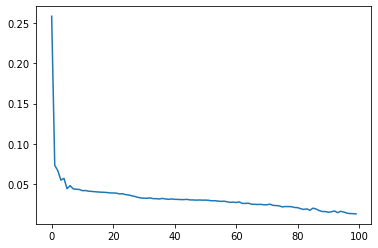

In [28]:
plt.plot(history.history['loss'])
plt.show()

In [29]:
# train data RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3384.484512029145

In [30]:
# train data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3407.724828131348

In [31]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

print("MAPE of training data",mape(y_train,train_predict),"MAPE of testing data",mape(ytest,test_predict))   
#print("MAPE of training data",mape(day_new,day_pred),"MAPE of testing data",mape(day_pred,day_new))   
 

MAPE of training data inf MAPE of testing data 671614.945739113


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [32]:
#np.mean((y_train-test_predict)**2)

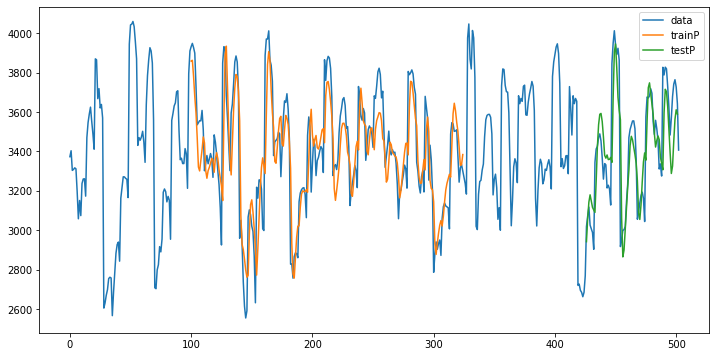

In [33]:
# plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]= train_predict
#shift test prediction for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]= numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
#plot baseline and predictions
plt.xlabel=('Date')
plt.ylabel=('Consumption')
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data','trainP', 'testP'])
plt.show()

In [34]:
len(test_data)

177

In [35]:
x_input=test_data[77:].reshape(1,-1)   #77
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [55]:
#demonstrate predictions for next 100 days
from numpy import array
lst_output=[]
n_steps=100    #100
i=0
while(i<30):       #30 for 30 days

    if(len(temp_input)>100):
      #print(temp_input)
      x_input=np.array(temp_input[1:])
      print("{} day input {}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input=x_input.reshape((1,n_steps,1))
      #print(x_input)
      yhat=model.predict(x_input,verbose=0)
      print("{} day output {}".format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      #print(temp_input)
      lst_output.extend(yhat.tolist())
      i=i+1
    else:
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

print(lst_output)


0 day input [0.53665137 0.48778301 0.47050619 0.47743371 0.50147319 0.53446239
 0.56854385 0.59760565 0.61824602 0.62963831 0.63331217 0.62980801
 0.62142861 0.61085695 0.60151792 0.59598362 0.59564573 0.59989959
 0.60646331 0.61236215 0.61443543 0.61019528 0.59849447 0.57968163
 0.55524755 0.52783084 0.50033879 0.47562718 0.45566511 0.44151923
 0.43335742 0.42928559 0.42830136 0.42875993 0.42906463 0.42809772
 0.42557144 0.42260748 0.42224249 0.42853105 0.44533399 0.47475976
 0.51533324 0.56339693 0.61337185 0.65610415 0.68764889 0.70385963
 0.70325637 0.68791938 0.66344905 0.6375879  0.61849421 0.61185455
 0.61874878 0.63406974 0.64832938 0.65200084 0.63962382 0.609317
 0.56636262 0.518206   0.47169417 0.43224791 0.40337086 0.38638264
 0.38066491 0.38336918 0.39098474 0.39992014 0.40705466 0.41010147
 0.40804145 0.40145802 0.39435366 0.3930327  0.40408707 0.43133217
 0.47478098 0.53101623 0.59325266 0.65207452 0.69728243 0.72098219
 0.72059667 0.69955683 0.66610932 0.63079256 0.60439

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)    #101,131

In [57]:
import matplotlib.pyplot as plt
len(df1)

503

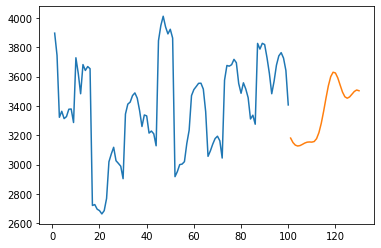

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[403:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

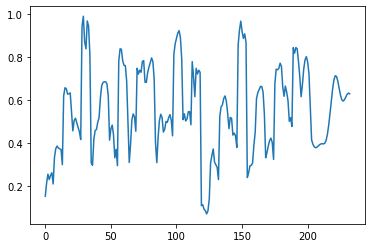

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('R2 Score: ', r2_score(ytest,test_predict))
print('MAE: ', mean_absolute_error(ytest,test_predict))
#print('R2 Score: ', r2_score(day_new,day_pred))
#print('MAE: ', mean_absolute_error(day_new,day_pred))

R2 Score:  -299605745.65940356
MAE:  3399.9256873213726


In [61]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

#evaluate_prediction(day_pred, day_new, 'LSTM')
evaluate_prediction(ytest,test_predict,'lstm')

lstm:
Mean Absolute Error: 3399.9257
Root Mean Square Error: 3407.7355



In [44]:
df1.mean()

0.5609402191256109

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#rmse=sqrt(mean_squared_error(day_new,day_pred))
rmse=sqrt(mean_squared_error(ytest,test_predict))
print(rmse)

3407.724828131348


In [63]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))*100

In [64]:
mape(ytest,test_predict)
#mape(X_test,ytest)
#mape(day_new,day_pred)

671614.945739113

In [65]:
correlation_matrix=np.corrcoef(ytest,test_predict)
#correlation_matrix = np.corrcoef(day_new,day_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

ValueError: ignored